### Step 1. Load essential libraries for data manipulation and model implementation.

In [122]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Step 2 Import wine dataset from sklearn

In [125]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

### 3. Split Data

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4. Standardize Data

In [131]:
# Standardize data to have mean = 0 and variance = 1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#### 5. Calculate Mean Vectors per Class

In [134]:
# Calculate Mean feature vectors for each class
mean_vectors = []
for cl in np.unique(y_train):
    mean_vectors.append(np.mean(X_train[y_train == cl], axis=0))

#### 6. Compute Scatter Matrices

##### Between class scatter matrix

In [138]:
# Between class scatter matrix shows how much the class differs from each other
mean_overall = np.mean(X_train, axis=0)
Sb = np.zeros((X_train.shape[1],X_train.shape[1]))

for cl, mean_vec in zip(np.unique(y_train), mean_vectors):
    n = X_train[y_train == cl].shape[0]
    mean_diff = (mean_vec - mean_overall).reshape(-1,1)
    Sb += n * (mean_diff @ mean_diff.T)

##### Within class scatter matrix

In [141]:
# Within class scatter matrix shows how much data varies within each class
Sw = np.zeros((X_train.shape[1], X_train.shape[1]))

for cl, mean_vec in zip(np.unique(y_train), mean_vectors):
    class_scatter = np.cov(X_train[y_train == cl].T)
    Sw += class_scatter

### 7. Solve Eigenvalue Problem

In [144]:
# Solve the generalized eigenvalue problem to find discriminant components.
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

### 8. Select Top Eigenvectors

In [147]:
# Choose top eigenvectors corresponding to the largest eigenvalues
eig_pairs = [(eig_vals[i], eig_vecs[:, i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

W = np.hstack((eig_pairs[0][1].reshape(-1, 1), eig_pairs[1][1].reshape(-1, 1)))

### 9. Project Data

In [161]:
# Transform data onto the new LDA space.
X_train_lda = X_train_lda.real
X_test_lda = X_test_lda.real

### 10. Classifier (Logistic Regression)

In [159]:
# Use Logistic Regression to classify data in LDA-transformed space.
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_lda, y_train)
print("Accuracy:", clf.score(X_test_lda, y_test))

Accuracy: 1.0


#### Lets visualize the data

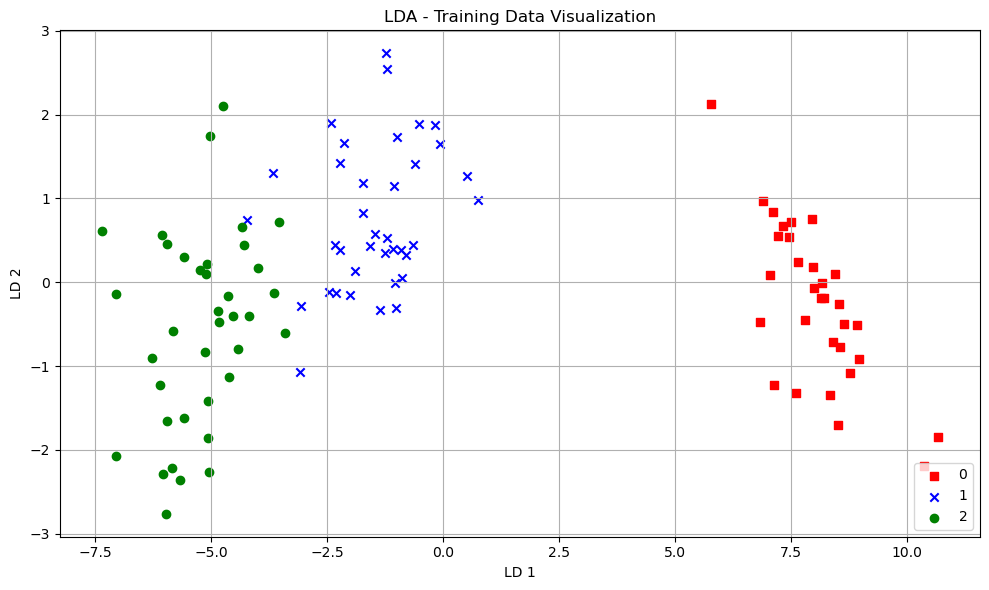

In [171]:
import numpy as np
import matplotlib.pyplot as plt

colors = ['r', 'b', 'g']  # Red, Blue, Green (Different colors for classes)
markers = ['s', 'x', 'o']  # Square, Cross, Circle (Different markers for classes)

plt.figure(figsize=(10, 6))
# Loop through unique class labels
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],       # LDA Component 1
                X_train_lda[y_train == l, 1] * (-1), # LDA Component 2 (inverted axis)
                c=c, label=l, marker=m)             # Color, Label, Marker

plt.xlabel('LD 1')         # Label for x-axis
plt.ylabel('LD 2')         # Label for y-axis
plt.title('LDA - Training Data Visualization')
plt.legend(loc='lower right')  # Legend placement
plt.tight_layout()            # Adjust layout for better fit
plt.grid(True)
plt.show()


### LDA using sklearn

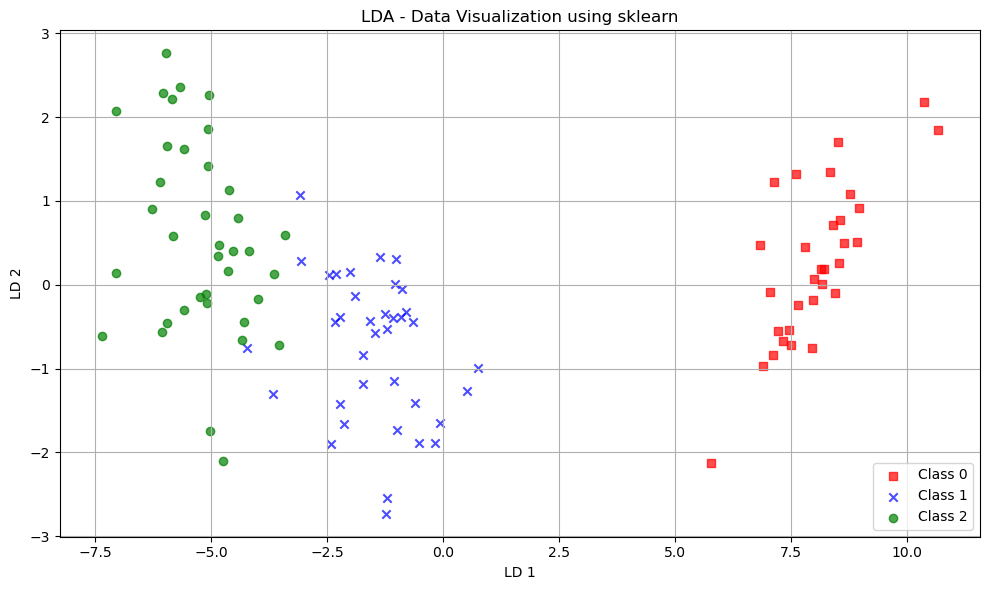

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Example Dataset (Iris dataset)
data = load_iris()
X = data.data
y = data.target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 1: Apply LDA
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduce to 2 Components
X_train_lda = lda.fit_transform(X_train, y_train)

# Step 2: Visualize
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

plt.figure(figsize=(10, 6))
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0], 
                X_train_lda[y_train == l, 1], 
                c=c, label=f'Class {l}', marker=m, alpha=0.7)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.title('LDA - Data Visualization using sklearn')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()